# Task : Customer Segmentation Using Python

Author : Saketh Maddineni


In [1]:
#Importing the prerequisite libriaries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the data
data_path = "Mall_Customers.csv"
dataset = pd.read_csv(data_path, index_col = 'CustomerID')
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


As the Data is imported, Now let's take a look at our dataset so we could preprocess it before modeling it.


In [3]:
dataset.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
dataset.value_counts()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
Female  18   65                  48                        1
Male    29   28                  82                        1
        24   60                  52                        1
        25   24                  73                        1
             77                  12                        1
                                                          ..
Female  41   99                  39                        1
             103                 17                        1
        42   34                  17                        1
        43   48                  50                        1
Male    70   49                  55                        1
Length: 200, dtype: int64

In [8]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Thoughts: 
There are 4 columns. Index is already set to CustomerID. Three of the columns are of integer data type and Gender Coulmn is of Object Datatype indicating Categorical Data. 
The dataset has no missing data.

# Pre-Processing Data


As we are using KMeans Clustering Algoritm, It's best to Scale the data. We are using StandardScaler().


In [9]:
from sklearn.preprocessing import StandardScaler
#let's filter out the object datatype before using the scaler

feature_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = dataset[feature_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = feature_cols)
scaled_features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [10]:
gender = dataset['Gender']
gender.replace('Male', '1', inplace = True)
gender.replace('Female', '0', inplace = True)

gender.head()


CustomerID
1    1
2    1
3    0
4    0
5    0
Name: Gender, dtype: object

In [11]:
gender.astype('int64')

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Name: Gender, Length: 200, dtype: int64

In [12]:
scaled_features.index = dataset.index
processed_data = scaled_features.join(gender)
processed_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0


As the preprocessing the data is over now lets Bulid a Clustering Model Using KMeans

# Building The Model

For applying KMeans we need to first find the optimum number of clusters. So, we use Elbow Method to find the Optimum number of Clusters .

D:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

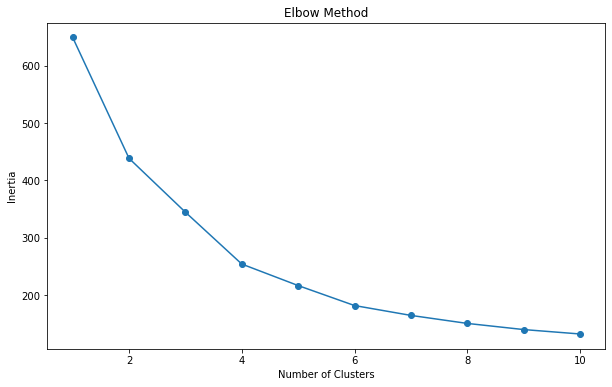

In [13]:
from sklearn.cluster import KMeans

SSE = []

for cluster in range(1,11):
    kmeans = KMeans( n_clusters = cluster , init = 'k-means++')
    kmeans.fit(processed_data)
    SSE.append(kmeans.inertia_)

#now let's plot the data for different no of clusters

plt.figure(figsize = (10,6))
plt.plot(np.arange(1,11), SSE , marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

We can see that the Optimum number of Clusters are 4.
So, Now let's build the Model

In [14]:
kmeans_model = KMeans(init = 'k-means++', n_clusters = 4, random_state = 0)

y_kmeans = kmeans_model.fit_predict(processed_data)
print(y_kmeans)

[3 3 3 3 3 3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 2 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 2 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 1 3 3 3 2 2 2 2 3 1 0 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


As we can see the cluster formation was done. Now let's Plot the Clusters along with their Centroids.

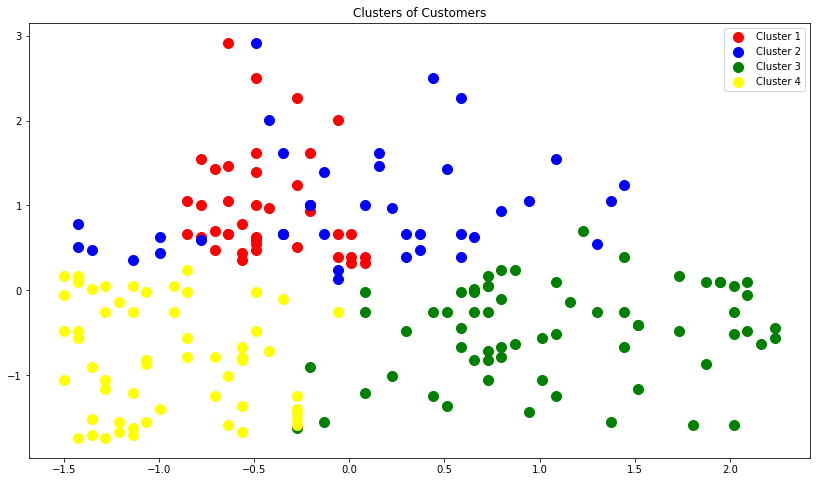

In [15]:
plt.figure(figsize = (14,8))

X = processed_data.values

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')


plt.title('Clusters of Customers')

plt.legend()
plt.show()

# Analysing the Clusters

Now let's add a Cluster column into our dataset

In [16]:
dataset['Cluster'] = y_kmeans
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,3
3,0,20,16,6,3
4,0,23,16,77,3
5,0,31,17,40,3


In [17]:
grupdf = dataset.groupby('Cluster').mean()
grupdf.head()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.875000,86.100000,81.525000
1,39.368421,86.500000,19.578947
2,53.984615,47.707692,39.969231
3,25.438596,40.000000,60.298246


Spending Score Vs Annual Income Vs Age

Text(0.5, 1.0, 'Age')

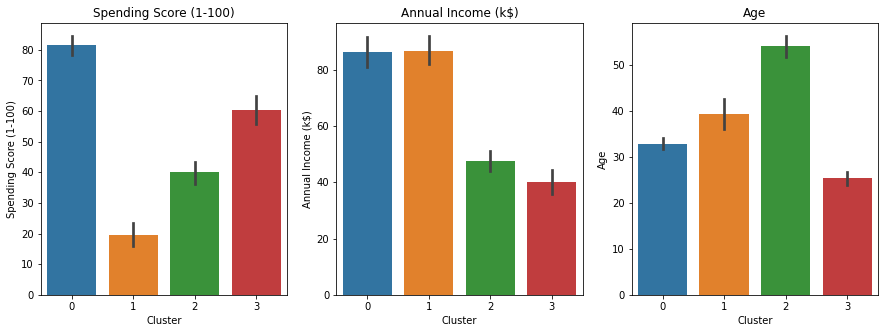

In [18]:

fig , ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x = dataset.Cluster, y = dataset['Spending Score (1-100)'] , label = 'Spending Score (1-100)', ax = ax[0])
ax[0].set_title("Spending Score (1-100)")
sns.barplot(x = dataset.Cluster, y = dataset['Annual Income (k$)'], label = 'Annual Income in (k$)', ax = ax[1])
ax[1].set_title("Annual Income (k$)")
sns.barplot(x = dataset.Cluster, y = dataset['Age'], ax = ax[2])
ax[2].set_title("Age")

In [19]:
dfgender = pd.DataFrame(dataset.groupby(['Cluster', 'Gender']).Gender.count())
dfgender

Gender
Cluster Gender        
0       0           22
        1           18
1       0           19
        1           19
2       0           37
        1           28
3       0           34
        1           23

Text(0.5, 1.0, 'Age')

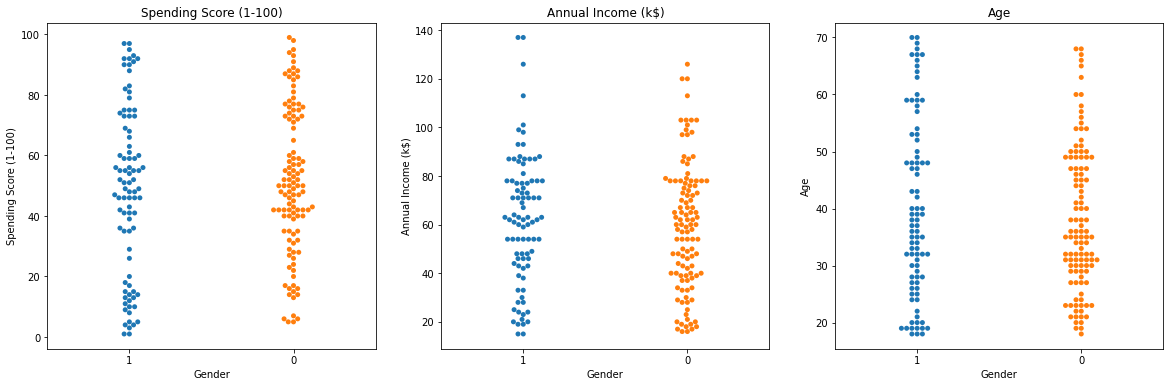

In [20]:
fig , ax = plt.subplots(1,3, figsize=(20,6))
sns.swarmplot(x=dataset['Gender'] , y = dataset['Spending Score (1-100)'] , label = 'Spending Score (1-100)', ax = ax[0])
ax[0].set_title("Spending Score (1-100)")
sns.swarmplot(x=dataset['Gender'] , y = dataset['Annual Income (k$)'], label = 'Annual Income in (k$)', ax = ax[1])
ax[1].set_title("Annual Income (k$)")
sns.swarmplot(x=dataset['Gender'] , y = dataset['Age'], ax = ax[2])
ax[2].set_title("Age")



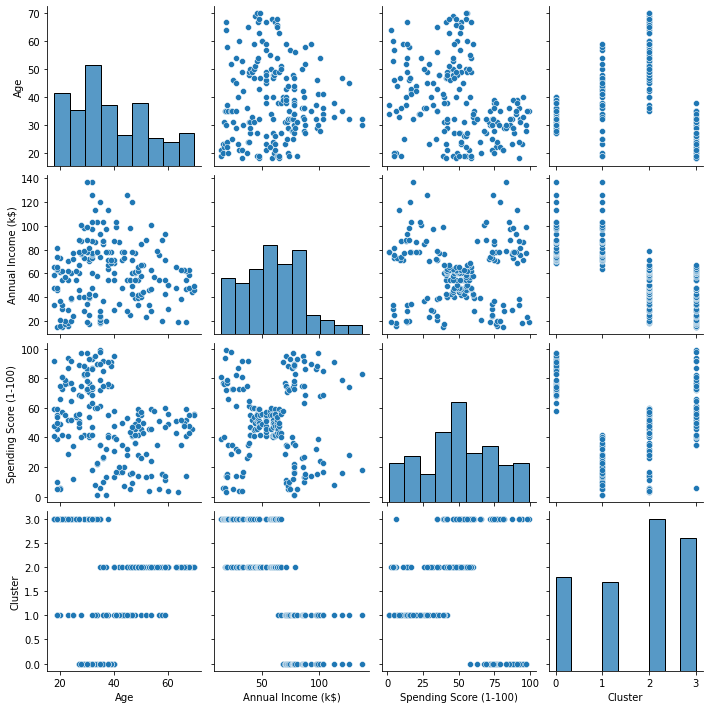

In [21]:
sns.pairplot(data = dataset)